# Tarea 1

Procesamiento de Lenguaje Natural
CIMAT

Ernesto Antonio Reyes Ramírez

# 1: Construcción de corpus:

Anexo el enlace a mi Gdrive con los datos que generé en la práctica 1.

https://drive.google.com/drive/folders/1UYy1rLNXa_U_BtzTgbCvoK0naOB9kS77?usp=share_link

# 2. Vistazo a los datos

In [50]:
import glob
import io

data = ""
for f_pagina in glob.glob("/home/ernesto/Documentos/Segundo/NLP/Practicas/Practica1/estenograficas_limpias_por_fecha/*"):
    text_file = open(f_pagina,"r")

    data = data + text_file.read()
 
    text_file.close()

#data_split contiene todas las palabras de todas las conferencias 
data_split = data.split()

In [51]:
#Aqui contamos la cantidad de palabras 

len(data_split)

11098393

In [52]:
#Extraemos el vocabulario y mostramos su longitud

vocabulary = set(data_split)
len(vocabulary)

204035

In [53]:
#Función que nos ayuda a calcular la riqueza de un texto
def lexical_diversity(text):
    return len(text)/len(set(text))

In [54]:
#Medimos la riqueza del vocabulario

print(lexical_diversity(data_split))

54.39455485578455


In [55]:
#Realizaremos los pasos anteriores pero con todas las letras en minusculas 

#Convertimos a minusculas
data_lower = data.lower()
data_lower_split = data_lower.split()

In [56]:
print("Cantidad de palabras: ", len(data_lower_split))

vocabulary_lower = set(data_lower_split)
print("Longitud del vocabulario: " ,len(vocabulary_lower))

print("Riqueza del vocabulario: ",lexical_diversity(data_lower_split))

Cantidad de palabras:  11098393
Longitud del vocabulario:  187524
Riqueza del vocabulario:  59.183853800046926


Cuando convertimos todas las palabras a minusculas es claro que el número de palabras que tenemos ahora es el mismo que el del texto original. Pero por otro lado, el vocabulario ahora es menor. Esto se debe a que por ejemplo antes podíamos tener dos palabras como "criminal" y "Criminal", las cuales significan lo mismo pero se cuentan como distintas por la letra mayuscula, y ahora al convertir a minusculas cuentan como una sola. 

Esto es bueno, ya que nos ayuda a reducir las palabras repetidas, las cuales puede que no nos aporten nada más (según nuestro problema), y quedarnos solo con un representante de cada una de ellas. 

In [57]:
#Vamos a realizar los pasos 1,2,3 usando el tokenizador RegExp

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[a-zA-Z\u00C0-\u017F]+")

data_token = tokenizer.tokenize(data)
data_token

['Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'de',
 'prensa',
 'matutina',
 'del',
 'presidente',
 'Andrés',
 'Manuel',
 'López',
 'Obrador',
 'Presidente',
 'de',
 'México',
 'Warning',
 'Invalid',
 'argument',
 'supplied',
 'for',
 'foreach',
 'in',
 'var',
 'www',
 'html',
 'wordpress',
 'wp',
 'content',
 'themes',
 'diplomat',
 'header',
 'socials',
 'php',
 'on',
 'line',
 'Inicio',
 'Sala',
 'de',
 'Prensa',
 'Boletines',
 'Transcripciones',
 'Documentos',
 'Fotogalería',
 'Videos',
 'Años',
 'de',
 'Transformación',
 'Gabinete',
 'Oficina',
 'de',
 'la',
 'Presidencia',
 'Biografía',
 'Contacto',
 'Search',
 'Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'de',
 'prensa',
 'matutina',
 'del',
 'presidente',
 'Andrés',
 'Manuel',
 'López',
 'Obrador',
 'Home',
 'Versión',
 'Estenográfica',
 'Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'de',
 'prensa',
 'matutina',
 'del',
 'presidente',
 'Andrés',
 'Manuel',
 'López',
 'Obrador',
 'Vers

In [60]:
import nltk

#Convertimos nuestra lista de tokens generadas por RegExp a un objeto Text
text_regexp = nltk.Text(data_token)

In [69]:
#Puntos 1,2,3

print("Cantidad de palabras: ", len(text_regexp))

print("Longitud del vocabulario: " ,len(set(text_regexp)))

print("Riqueza del vocabulario: ",lexical_diversity(text_regexp))

Cantidad de palabras:  10967166
Longitud del vocabulario:  88173
Riqueza del vocabulario:  124.38236194753496


In [61]:
#Utilizaremos el tokenizador tweetTokenizer para realizar nuevamente los puntos 1,2,3

from nltk.tokenize import TweetTokenizer

In [62]:
tk = TweetTokenizer()

text = tk.tokenize(data_lower)

In [63]:
#Aquí pasamos de una list a un objecto Text de NLTK
textcontent = nltk.Text(text)

In [64]:
#Puntos 1,2,3

print("Cantidad de palabras: ", len(textcontent))

vocabulary_tk = set(textcontent)
print("Longitud del vocabulario: " ,len(vocabulary_tk))

print("Riqueza del vocabulario: ",lexical_diversity(textcontent))

Cantidad de palabras:  12864009
Longitud del vocabulario:  82480
Riqueza del vocabulario:  155.9651915615907


# 3. Funciones NLTK

In [ ]:
#Utilizaremos la función concordance para ver el contexto de 5 palabras

textcontent.concordance("corrupción")

In [14]:
textcontent.concordance("narco")

Displaying 25 of 62 matches:
obradorista — está usando dinero del narco para la campaña del estado de méxico
ién que obrador está construyendo un narco régimen militarizado ’ . la verdad ,
do cuenta que estaba yo construyendo narco régimen militarizado . ah , pero hay
oraron la existencia de amenazas del narco para cerrar esas estaciones o prohib
eños de las estaciones , los pone el narco contra la pared , luego profeco les 
ue la estrategia de guerra contra el narco estaba mal y por qué estaba mal . un
n . no usan palabras directas como ‘ narco ’ , ‘ cártel ’ o ‘ sicario ’ , pero 
atria en la fallida guerra contra el narco . cabe señalar que pese a que desde 
lderón , que le declare la guerra al narco , presidente ? presidente andrés man
calderón que le declare la guerra al narco , ¿ no sería empoderar más ? preside
el equivalente a ‘ las mulas ’ en el narco ? entonces , ¿ bajo qué marco jurídi
a obradorista está usando dinero del narco para la campaña del estado de méxico
irlo con má

In [15]:
textcontent.concordance("aeropuerto")

Displaying 25 of 3249 matches:
 . ¿ qué fue lo que sucedió en el aeropuerto de cancún al mediodía ? se cayero
otó para decidir qué hacer con el aeropuerto del lago de texcoco y su comentar
 sobre el avance de las obras del aeropuerto ‘ felipe ángeles ’ y de la refine
 conocer todos los lunes sobre el aeropuerto internacional general felipe ánge
os avances en la construcción del aeropuerto internacional ‘ felipe ángeles ’ 
 o sea , estos cuatro proyectos , aeropuerto ‘ felipe ángeles ’ , la refinería
 en santa lucía , en lo que es el aeropuerto militar-civil ‘ felipe ángeles ’ 
zo del 22 se inaugura completo el aeropuerto . pero los que están trabajando e
ento , va a haber tiempo - lo del aeropuerto de texcoco , que estaban estimand
 y se iba a desaparecer el actual aeropuerto y el aeropuerto de santa lucía , 
parecer el actual aeropuerto y el aeropuerto de santa lucía , 300 mil e iba a 
ba a dejar de funcionar el actual aeropuerto y el de santa lucía por interfere
e en las 600 hectárea

In [16]:
textcontent.concordance("rifa")

Displaying 25 of 198 matches:
a , pero no deshonra . eso es lo que rifa actualmente y así va a ser . ya los 
tima , ahora sí , ¿ cómo va lo de la rifa del avión ? tengo entendido que se s
na . lo otro es lo del avión . va la rifa , ya se están distribuyendo boletos 
marlo . pero hay esa actitud . va la rifa , se están vendiendo así al por mayo
decidido que lo que se obtenga de la rifa del avión es para la compra de equip
ones que resultaron ganadoras por la rifa del costo del avión presidencial y d
os que obtuvieron sus premios con la rifa del avión presidencial , precisament
 premios y hacer un informe sobre la rifa del avión . interlocutora : ¿ no sab
ido a la cena de empresarios para la rifa del avión y que además sea uno de lo
os que se necesitaban vender para la rifa del avión . ayer había colas en algu
tamos temas . por ejemplo , lo de la rifa , que hoy nos vamos a reunir , ¿ con
en noticia falsa sobre premios de la rifa del avión presidencial . el día de a
e se aseguraba que los

In [25]:
textcontent.concordance("oposición")

Displaying 25 of 996 matches:
o . nosotros , que padecimos en la oposición el cerco informativo , cómo la … y
te mucho tiempo y que estuve en la oposición , yo creo que lo mejor de todo es 
 años y se canceló porque pues hay oposición en veracruz , en tamaulipas , en s
ho tiempo , cuando estábamos en la oposición y se logró que pagan un impuesto p
es decir , es normal que exista la oposición . hay quienes están como fuera de 
legitimar el presupuesto porque la oposición no lo aprueba o también lo puede d
nión respecto , de nueva cuenta la oposición durante la discusión de la aprobac
respecto a esto que señaló ayer la oposición sobre este señalamiento que realme
va a recomponer la relación con la oposición , después de que no votó el presup
sto ? hubo también gobernadores de oposición que quedaron lastimados , porque d
dor : sí , buenísimo , que viva la oposición . terminamos . pregunta : buenos d
to desesperado por articular a una oposición que no encuentra liderazgos valios
 nosotros 

In [18]:
#Vamos a ver los contextos comunes de las palabra corrupción

textcontent.similar("corrupción")

que información violencia seguridad gente justicia salud eso y
impunidad méxico investigación vida democracia semana población
comunicación ley esto mañana


In [19]:
textcontent.common_contexts(["violencia","corrupción"])

la_y la_en la_contra de_en la_que la_no la_con de_y de_de de_que la_de
la_entonces de_contra la_por la_se la_el la_la la_pero la_es la_a


Como podemos notar estas palabras comparten contextos donde se habla de procesos de corrupción por ejemplo donde 
se llevó acabo actos de violencia. 

In [ ]:
#Aqui vamos a ordenar los archivos cuando sepamos bien 



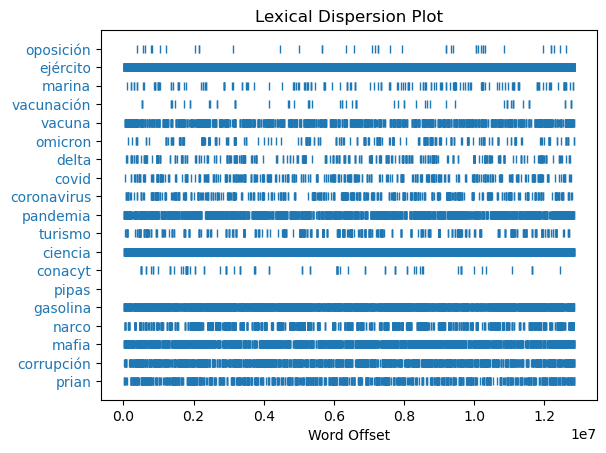

In [20]:
textcontent.dispersion_plot(["prian", "corrupción", "mafia", "narco", "gasolina", "pipas", "conacyt", "ciencia", "turismo", "pandemia", "coronavirus", "covid", "delta", "omicron", "vacuna", "vacunación", "marina", "ejército", "oposición"])

In [22]:
#Mostramos 50 colocaciones 

textcontent.collocations(50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; estados
unidos; por ciento; buenos días; señor presidente; versión
estenográfica; prensa matutina; todos los; nada más; guardia nacional;
muchas gracias; tren maya; desde luego; adultos mayores; por eso; por
ejemplo; derechos humanos; sin embargo; mil millones; baja california;
marcelo ebrard; creo que; todas las; quintana roo; muy importante;
sobre todo; matutina del; que que; por qué; muy bien; nuestro país;
tiene que; ver con; benito juárez; para que; sembrando vida; comisión
federal; los trabajadores; que nos; seguridad pública; dos bocas;
nuevo león; gobierno federal; poder judicial; 5093 4900; argument
supplied; documentosdocumentos gabinetegabinete


In [ ]:
#Vamos a crear un histograma con las longitudes de las palabras 

#Primero creamos una lista con las 
lst2 = sorted(lst, key=len)

In [9]:
#50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5
from nltk.probability import FreqDist

fdist_text = FreqDist(textcontent)

In [31]:
lista_req = [clave for clave, valor in fdist_text.items() if (len(clave) > 8 and valor > 5)]

In [33]:
lista_req[:50]

['estenográfica',
 'conferencia',
 'presidente',
 'wordpress',
 'wp-content',
 'header-socials.php',
 'boletines',
 'transcripciones',
 'documentos',
 'fotogalería',
 'transformación',
 'presidencia',
 'biografía',
 'precursor',
 'revolución',
 'comenzamos',
 'información',
 'impunidad',
 'básicamente',
 'preguntas',
 'respuestas',
 'subsecretario',
 'seguridad',
 'secretaría',
 'protección',
 'ciudadana',
 'secretarías',
 'coordinación',
 'autoridades',
 'detenidos',
 'presentaron',
 'ministerio',
 'informamos',
 'detención',
 'francisco',
 'michoacana',
 'huehuetoca',
 'realizada',
 'antihomicidios',
 'portación',
 'prohibido',
 'aprehensión',
 'homicidio',
 'organización',
 'propaganda',
 'estructura',
 'vinculado',
 'siguiente',
 'presuntos',
 'secuestradores']

In [ ]:
#Grafica como en la sección 1.5: pensar en que palabras usar 

In [5]:
#Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("spanish"))

In [6]:
filtered_text = []

for w in textcontent:
    if w not in stop_words:
        filtered_text.append(w)

In [7]:
print("Cantidad de palabras con stopwords: ", len(textcontent))

print("Cantidad de palabras sin stopwords: ", len(filtered_text))

Cantidad de palabras con stopwords:  12864009
Cantidad de palabras sin stopwords:  7220972


In [16]:
#300 palabras más frecuentes en las conferencias sin tomar en cuenta stopwords

freq_words = [w for w in fdist_text if w not in stop_words]
freq_words[:300]

[',',
 '.',
 ':',
 'presidente',
 '¿',
 '?',
 'lópez',
 'manuel',
 'obrador',
 'si',
 'andrés',
 'entonces',
 'va',
 'vamos',
 'méxico',
 ';',
 'mil',
 'gobierno',
 'aquí',
 'dos',
 'ahora',
 'nacional',
 'ver',
 'pues',
 '-',
 'caso',
 '‘',
 'ahí',
 'millones',
 'bueno',
 '’',
 'país',
 'pregunta',
 'días',
 'cómo',
 'van',
 'ser',
 'usted',
 'hacer',
 'pesos',
 'señor',
 'así',
 'gente',
 '…',
 'gracias',
 'ciento',
 'pueblo',
 'años',
 'salud',
 'tema',
 'bien',
 'tres',
 'año',
 'decir',
 'importante',
 'puede',
 'parte',
 'tener',
 'mismo',
 'seguridad',
 'día',
 'información',
 'hoy',
 'manera',
 'personas',
 'interlocutor',
 'hace',
 'tiempo',
 'general',
 'prensa',
 'buenos',
 'interlocutora',
 '/',
 'unidos',
 'todas',
 'poder',
 'secretaría',
 'luego',
 'corrupción',
 'ayer',
 'sólo',
 'voy',
 'muchas',
 'acuerdo',
 'además',
 'haciendo',
 'ciudad',
 'programa',
 'trabajo',
 'ustedes',
 'federal',
 'pública',
 'conferencia',
 'ejemplo',
 'semana',
 'toda',
 'siempre',
 'empre

# 4. Otras librerías en python

Librerias de Python para NLP

1. Gensim:

Ventaja: Tiene una interfaz muy intuitiva, es escalable y tiene una implementación eficiente de algoritmos muy usados como LSA y LDA. 

Desventaja: Esta libreria está diseñada para los modelos de texto no supervisados. No es tan completa y a menudo debe utilizar con otras bibliotecas como NLTK. 

2. spaCy

Ventaja: Esta libreria es rápida, fácil de usar y se basa en redes neuronales para entrenar sus modelos.

Desventaja: No es tan flexible como otras bibliotecas, como por ejemplo NLTK.

Librerías de otros lenguajes para NLP

1. Java: En este lenguaje de programción tenemos la libreria Apache OpenNLP para trabajar en procesamiento de lenguaje natural. 

Ventaja: Esta libreria tiene en sus algoritmos una curva de aprendizaje poco profunda y además proporciona una documentación detallada con muchos ejemplos.

Desventaja: Los modelos actuales provistos pueden necesitar más entrenamiento según su caso de uso. 

2. R: En el lenguaje R tenemos el paquete koRpus.

Ventaja: Incluye una diversa colección de funciones para la detección automática de idioma. También incluye índices de diversidad léxica, como la proporción de token de tipo, MTLD, etc.


Desventaja:Puede ser más complicada de utilizar que otras librerías más intuitivas como NLTK. 


3. Java: Nuevamente en Java tenemos otra opción para trabajar en NLP la cual es la librería Stanford CoreNLP

Ventaja: No puede analizar las dependencias sintácticas de forma inmediata con NLTK. Debes especificar una gramática para eso, lo que puede ser muy tedioso si el dominio del texto no está restringido. Mientras que Standford CoreNLP proporciona un analizador probabilístico para texto general como un modelo descargable, que es bastante preciso.


Desventaja: A diferencia de otras librerías como NLTK, CoreNLP no cuenta con multiples versiones o interfaces de herramientas de NLP, solo tiene una única versión. 